In [1]:
from __future__ import print_function

from matplotlib.pyplot import imshow, show

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


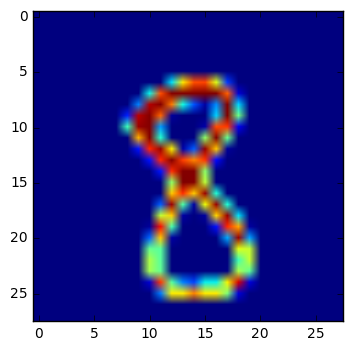

In [2]:
imshow(mnist.train.images[7378].reshape(28,28))
show()

In [3]:
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)

In [4]:
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [5]:
W_out = tf.get_variable('W_out', [n_hidden, n_classes])
b_out = tf.get_variable('b_out', [n_classes])

In [6]:
def RNN(x, W, b):
    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, n_steps, n_input)
    # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, n_input])
    # -1 veut dire que la taille de cette dimension est calculée de façon à ce que la taille totale ne change pas
    x = tf.split(0, n_steps, x) # pour avoir n_step tenseurs de forme [batch_size, n_input]
    
    lstm_cell = rnn_cell.BasicLSTMCell(n_hidden, state_is_tuple=True)
    outputs, states = rnn.rnn(lstm_cell, x, dtype=tf.float32)
    
    return tf.matmul(outputs[-1], W) + b

In [7]:
pred = RNN(x, W_out, b_out)

In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [10]:
init = tf.initialize_all_variables()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    step=1
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x = batch_x.reshape(batch_size, n_steps, n_input)
        
        sess.run(optimizer, {x:batch_x, y: batch_y})
        
        if step % display_step == 0:
            acc = sess.run(accuracy, {x: batch_x, y: batch_y})
            loss = sess.run(cost,{x: batch_x, y: batch_y})
            print("Iter", step*batch_size, ": Accuracy", acc, "Loss", loss)
            
        step +=1
    print("Optimization finished !")
    
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape(-1, n_steps, n_input)
    test_label = mnist.test.labels[:test_len]
    print("Test accuracy:", sess.run(accuracy, {x: test_data, y: test_label}))

Iter 1280 : Accuracy 0.3125 Loss 2.1485
Iter 2560 : Accuracy 0.429688 Loss 1.83378
Iter 3840 : Accuracy 0.570312 Loss 1.44445
Iter 5120 : Accuracy 0.6875 Loss 1.12754
Iter 6400 : Accuracy 0.773438 Loss 0.765323
Iter 7680 : Accuracy 0.664062 Loss 1.06549
Iter 8960 : Accuracy 0.664062 Loss 0.95554
Iter 10240 : Accuracy 0.726562 Loss 0.729245
Iter 11520 : Accuracy 0.828125 Loss 0.538397
Iter 12800 : Accuracy 0.796875 Loss 0.665801
Iter 14080 : Accuracy 0.828125 Loss 0.637012
Iter 15360 : Accuracy 0.851562 Loss 0.429277
Iter 16640 : Accuracy 0.898438 Loss 0.452528
Iter 17920 : Accuracy 0.867188 Loss 0.376387
Iter 19200 : Accuracy 0.90625 Loss 0.346119
Iter 20480 : Accuracy 0.953125 Loss 0.199718
Iter 21760 : Accuracy 0.851562 Loss 0.410036
Iter 23040 : Accuracy 0.914062 Loss 0.26112
Iter 24320 : Accuracy 0.882812 Loss 0.403647
Iter 25600 : Accuracy 0.859375 Loss 0.411579
Iter 26880 : Accuracy 0.921875 Loss 0.267192
Iter 28160 : Accuracy 0.914062 Loss 0.299719
Iter 29440 : Accuracy 0.953125